# Flower Classification using CNNs

**Deep learning** is a vast field so let us narrow our focus a bit and take up the challenge of solving an Image Classification project. Additionally, I’ll be using a very simple deep learning architecture to achieve a pretty impressive accuracy score.

## What is Image Classification?
Consider the below image:
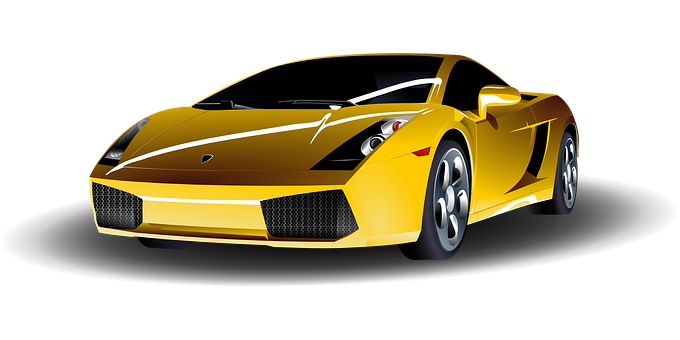

You will have instantly recognized it – it’s a car. Take a step back and analyze how you came to this conclusion – you were shown an image and you classified the class it belonged to (a car, in this instance). And that, in a nutshell, is what image classification is all about.

Image classification is the process of labeling images according to predefined categories. The process of image classification is based on supervised learning. An image classification model is fed a set of images within a specific category. Based on this set, the algorithm learns which class the test images belong to, and can then predict the correct class of future image inputs, and can even measure how accurate the predictions are.

This process introduces multiple challenges, including scale variation, viewpoint variation, intra-class variation, image deformation, image occlusion, illumination conditions ,and background clutter.

There is potentially n number of categories in which a given image can be classified. Manually checking and classifying images is a very tedious process. The task becomes near impossible when we’re faced with a massive number of images, say 10,000 or even 100,000. How useful would it be if we could automate this entire process and quickly label images per their corresponding class?

Self-driving cars are a great example to understand where image classification is used in the real world. To enable autonomous driving, we can build an image classification model that recognizes various objects, such as vehicles, people, moving objects, etc. on the road. 



# The Use of Convolutional Neural Networks for Image Classification:

A neural network in which at least one layer is a convolutional layer. A typical convolutional neural network consists of some combination of the following layers: convolutional layers, pooling layers, dense layers

The CNN approach is based on the idea that the model function properly based on a local understanding of the image. It uses fewer parameters compared to a fully connected network by reusing the same parameter numerous times. While a fully connected network generates weights from each pixel on the image, a convolutional neural network generates just enough weights to scan a small area of the image at any given time.

This approach is beneficial for the training process━the fewer parameters within the network, the better it performs. Additionally, since the model requires less amount of data, it is also able to train faster.

Convolutional neural networks have had great success in certain kinds of problems, such as image recognition.

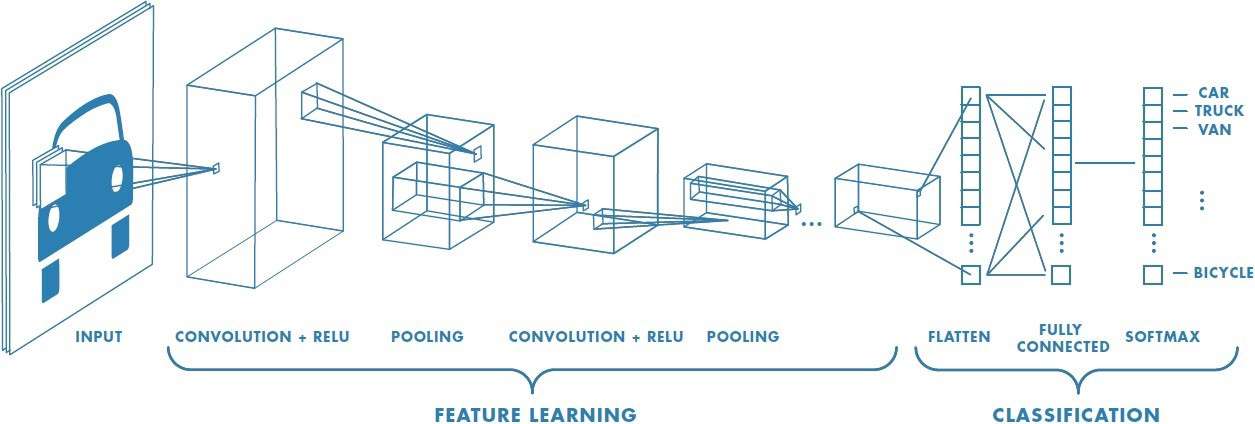

![ConvNet](https://developer.google.com/machine-learning/practica/image-classification/images/convolution_overview.gif "conv")

 A 3x3 convolution of depth 1 performed over a 5x5 input feature map, also of depth 1. There are nine possible 3x3 locations to extract tiles from the 5x5 feature map, so this convolution produces a 3x3 output feature map.

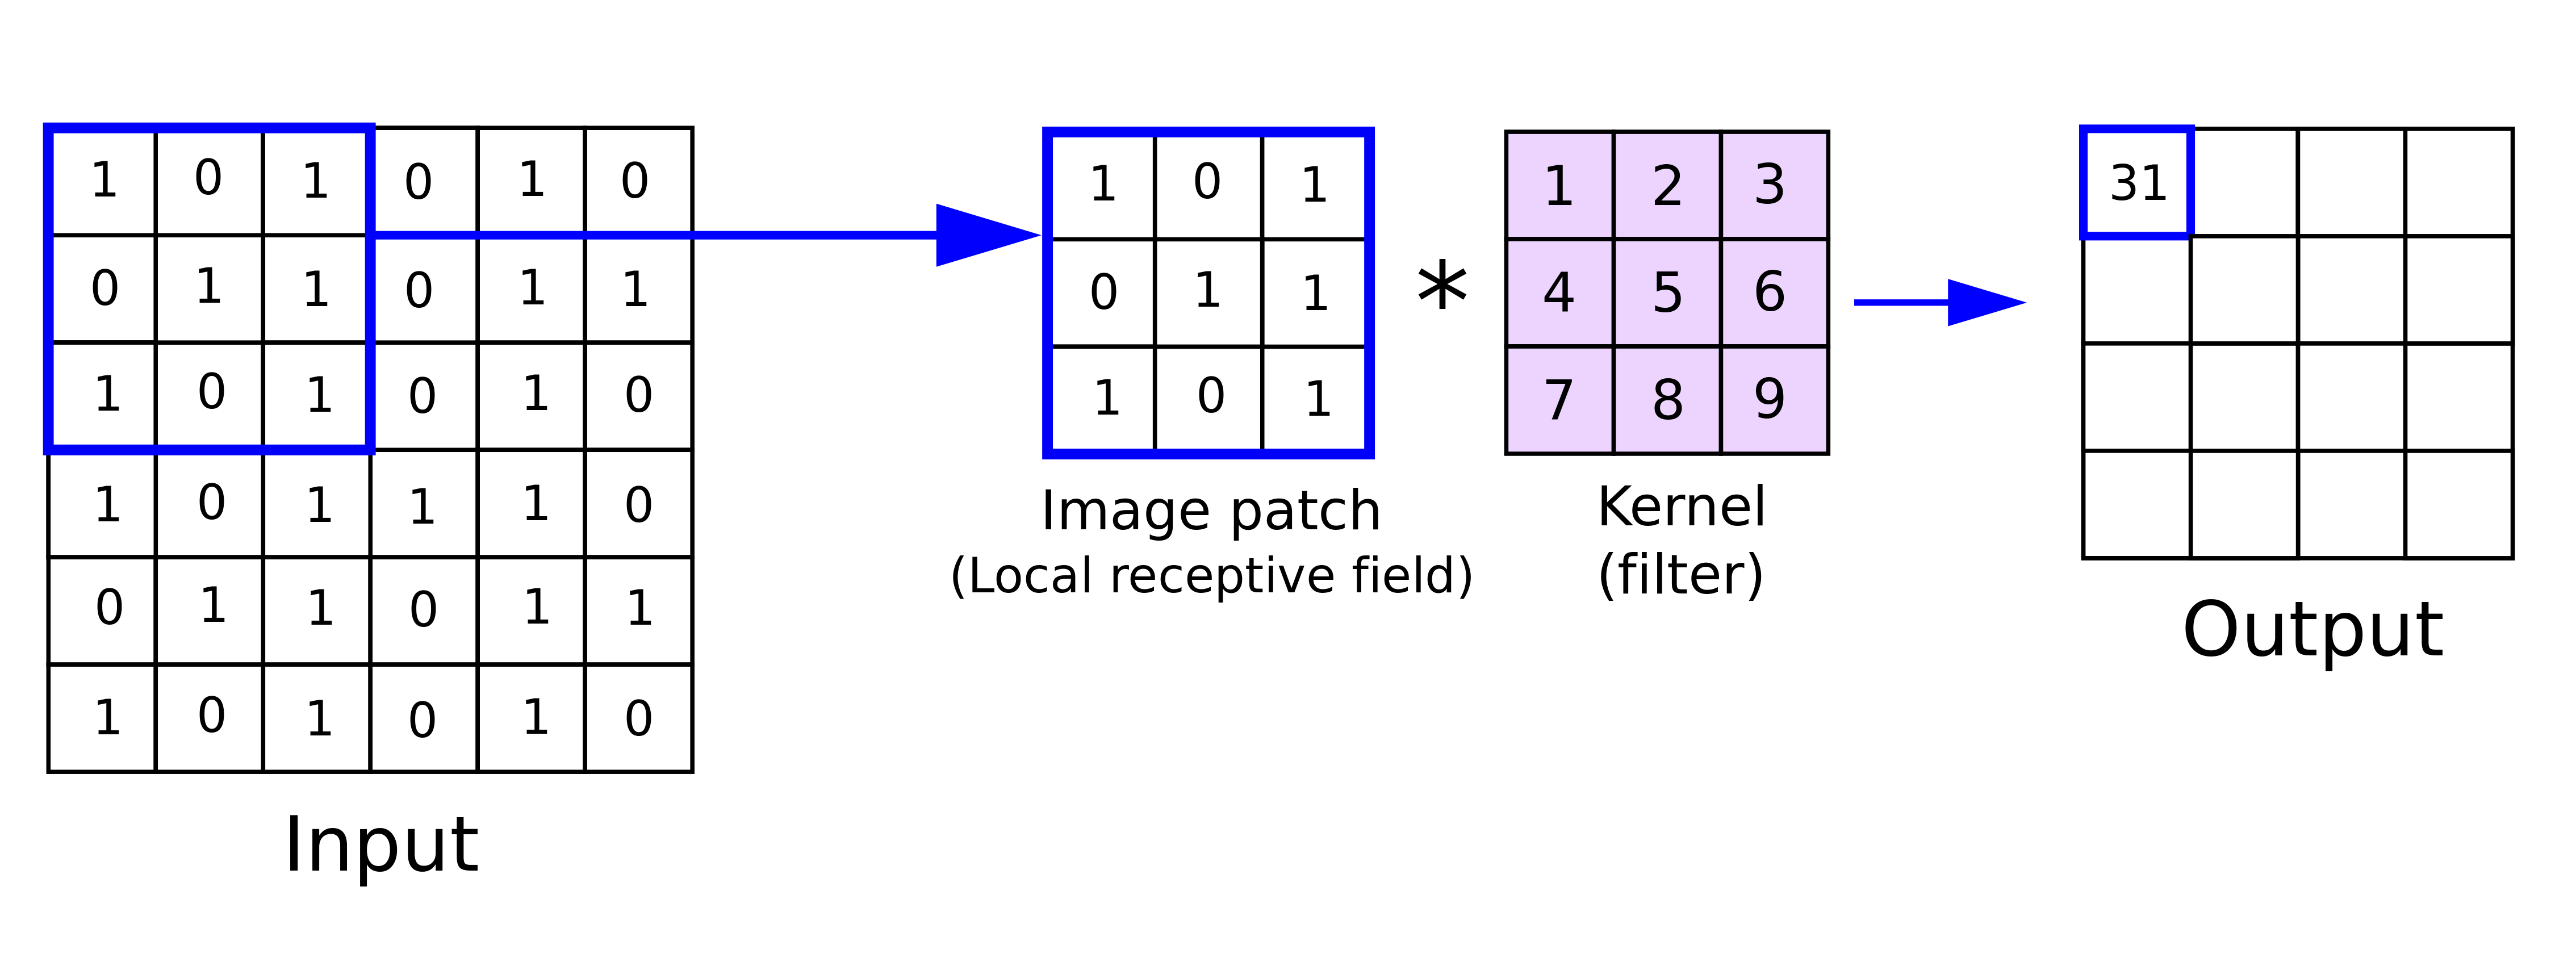

## Forward Pass
This is where the image is broken down into features, reconstructed ,and predicted at the end. Let us examine each step involved.

Input: 
Images will be fed as input which will be converted to tensors and passed on to CNN Block.

CNN Block

This is the most important block in the neural networks. The following steps will happen inside the CNN block.

The input tensor will be broken down into basic channels. Imagine this like dismantling an assembled lego board into smaller pieces. 
The features inside these channels are then used to construct edges and gradients.
Using these edges and gradients, we construct textures and patterns.
From these textures and patterns, we build parts of objects.
These parts of objects will be used to reconstruct objects.

### A basic machine learning workflow:

1)Data walkthrough

2)Build an input pipeline

3)Build the model

4)Train the model

5)Test the model

6)Improve the model and repeat the process 

# Flower - A simple dataset for flower image classification practice
About this directory - 
This is a simple yet excellent dataset for beginner programmers to learn image classification.
It contains images of sunflower, lotus ,and rose split into training and validation set.
We need to classify these three flower classes and make a classifier out of our model which can predict results accurately on unseen data.

Dataset link - https://www.kaggle.com/ayaanmustafa/flower


## Importing important libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import random as rn
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D,GlobalAvgPool2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.optimizers import Adam
import cv2
from keras.preprocessing.image import ImageDataGenerator


## Getting the different class labels

In [2]:
labels = os.listdir('../input/flower/flower_images/training')
print(labels)

['sunflower', 'rose', 'lotus']


## Walking through training directory 

In [3]:
num = []
for label in labels:
    path = '../input/flower/flower_images/training/{0}/'.format(label)
    folder_data = os.listdir(path)
    k = 0
    print('\n', label.upper())
    for image_path in folder_data:
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', label, 'class')


 SUNFLOWER
there are  126  images in  sunflower class

 ROSE
there are  75  images in  rose class

 LOTUS
there are  71  images in  lotus class


## plotting graph for classes

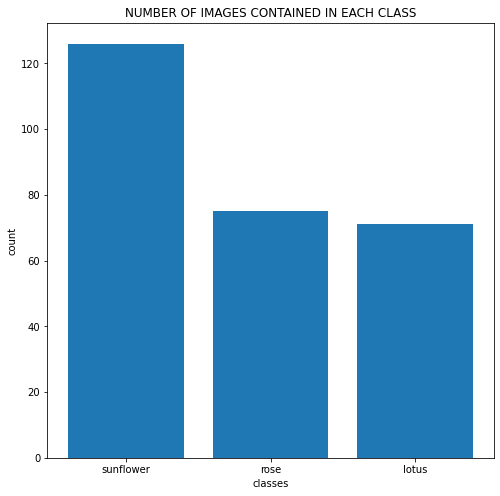

In [4]:
plt.figure(figsize = (8,8))
plt.bar(labels, num)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.ylabel('count')
plt.show()

## creating training set 

Here we create two lists one for training images(x_data) and another for training labels(y_data). Some preprocessing on images is done mainly resizing to 150,150 (height, width). Both lists are converted to NumPy arrays which behave like tensors to be fed to the neural network.

In [5]:
x_data =[]
y_data = []
import cv2
for label in labels:
    path = '../input/flower/flower_images/training/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path,cv2.IMREAD_COLOR)
        image_resized = cv2.resize(image, (150,150))
        x_data.append(np.array(image_resized))
        y_data.append(label)

## Visualize the data


Randomly selected images from each class are displayed from our training set

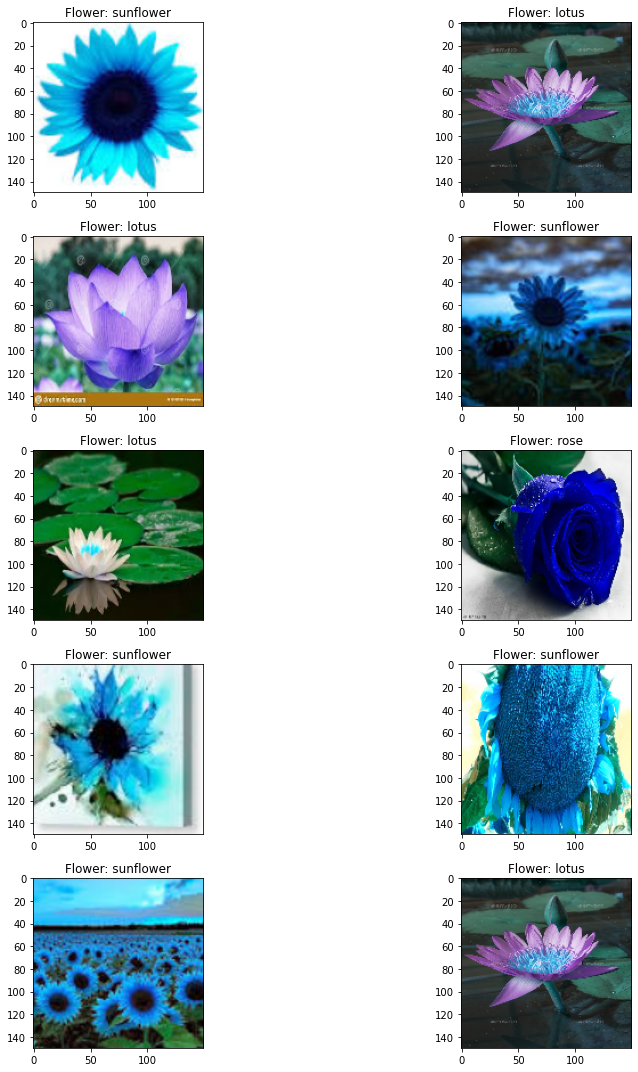

In [6]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(y_data))
        ax[i,j].imshow(x_data[l])
        ax[i,j].set_title('Flower: '+y_data[l])
        
plt.tight_layout()

The image_batch is a tensor of the shape (272, 150, 150, 3). This is a batch of 272 images of shape 150x150x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (272,), these are corresponding labels to the 272 images.

You can call .numpy() on the image_batch and labels_batch tensors to convert them to a numpy.ndarray.

In [7]:
x_data = np.array(x_data)

y_data = np.array(y_data)

print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)


the shape of X is:  (272, 150, 150, 3) and that of Y is:  (272,)


## Handling categorical labels 

An ordinal encoding involves mapping each unique label to an integer value.Encode target labels with value between 0 and no._of_classes-1.This transformer should be used to encode target values, i.e. y, and not the input X. 

inverse_transform(y)-Transform labels back to original encoding.

In [8]:
le=LabelEncoder()
Y=le.fit_transform(y_data)
Y=to_categorical(Y,3)
x_data = x_data/255   #standarization 

We get each image labels within the 3 classes

In [9]:
Y.shape

(272, 3)

## Create the model
The model consists of three convolution blocks. There's a fully connected layer with 128 units on top of it that is activated by a relu activation function. This model has not been tuned for high accuracy, the goal is to show a standard approach.
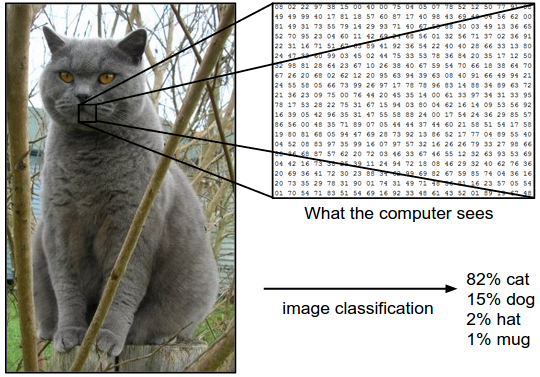
For example, in the image below an image classification model takes a single image and assigns probabilities to 4 labels, {cat, dog, hat, mug}. As shown in the image, keep in mind that to a computer an image is represented as one large 3-dimensional array of numbers. In this example, the cat image is 248 pixels wide, 400 pixels tall, and has three color channels Red,Green,Blue (or RGB for short). Therefore, the image consists of 248 x 400 x 3 numbers, or a total of 297,600 numbers. Each number is an integer that ranges from 0 (black) to 255 (white). Our task is to turn this quarter of a million numbers into a single label, such as “cat”.

In [10]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))

model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(3, activation = "softmax"))

To complete our model, you will feed the last output tensor from the convolutional base into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. Flowers has 3 output classes, so you use a final Dense layer with 3 outputs and a softmax activation.

## Compile the model
For this tutorial, choose the optimizers.Adam optimizer(Adaptive Moment Estimation combines ideas from both RMSProp and Momentum. It computes adaptive learning rates for each parameter and works as follows) ,and losses.CategoricalCrossentropy loss function. To view training and validation accuracy for each training epoch, pass the metrics argument.



In [11]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['acc'])

## Model summary
View all the layers of the network using the model's summary method:

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      1216      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
flatten (Flatten)            (None, 1440000)           0         
_________________________________________________________________
dense (Dense)                (None, 256)               368640256 
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 7

This is a basic model, later for enhancement pooling layers, Dropout and adding strides for faster computing could be done.

# Creating Validation set

In [13]:
test_label = os.listdir('../input/flower/flower_images/validation')
print(test_label)

['lotus_val', 'sunflower_val', 'rose_val']


Same pre processing as training set


In [14]:
x_test =[]
y_test = []

for label in test_label:
    path = '../input/flower/flower_images/validation/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path,cv2.IMREAD_COLOR)
        image_resized = cv2.resize(image, (150,150))
        x_test.append(np.array(image_resized))
        y_test.append(label)

Standardize the data
The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small. Here, we will standardize values to be in the [0, 1] by using a Rescaling.

In [15]:
x_test = np.array(x_test)
x_test = x_test/255
y_test = np.array(y_test)
le = LabelEncoder()
y = le.fit_transform(y_test)
y = to_categorical(y,3)


In [16]:
x_test.shape,y.shape

((59, 150, 150, 3), (59, 3))

To avoid doing the same preprocessing and labeling task over validation and training set we could also define a function for that purpose and call it when required. But for beginners and better understanding, I've broken done the tasks. Another method could be concatenating train ,and test sets and separate later on. If training, validation and test sets aren't provided separately, we can do it using the scikit-learn train_test_split() method over the entire dataset

## Regularization

One of the biggest problem in training neural network is how long to train the model.Training too little will lead to underfit in train and test sets. Traning too much will have the overfit in training set and poor result in test sets.

Here the challenge is to train the network long enough that it is capable of learning the mapping from inputs to outputs, but not training the model so long that it overfits the training data.

One possible solution to solve this problem is to treat the number of training epochs as a hyperparameter and train the model multiple times with different values, then select the number of epochs that result in the best accuracy on the train or a holdout test dataset, But the problem is it requires multiple models to be trained and discarded.

**Early Stopping** - Keras supports the early stopping of training via a callback called EarlyStopping. 
This callback allows you to specify the performance measure to monitor,the trigger, and once triggered, it will 
stop the training process. For my model I've specified to stop after 7 iterations of no improvement in validation loss

In [18]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=7, verbose=1, mode='auto')


### Backward Pass
We covered how an image is classified via forward pass. Next, let us inspect what happens backward. We call this back propagation. This is where CNN collects feedback and improves itself.

After prediction, each layer will receive feedback from its preceding layer. Feedback will be in the form of losses incurred at each layer during prediction.
Aim of the CNN algorithm is to arrive at optimal loss. We call this as local minima.
Based on the feedback, network will update the weights of kernels. 
This will make the output of convolutions better when next time forward pass happens.
When the next forward pass happens, loss will come down. Again, we will do back prop, the network will continue to adjust, a loss will further come down and process repeats.
This forward pass followed by back prop keeps happening the number of times we choose to train our model. We call it epochs. 

## Fitting model

In [19]:
History = model.fit(x_data,Y,epochs = 100, validation_data = (x_test,y),
                    verbose = 1,callbacks=[early_stop])

Epoch 1/100
9/9 [==============================] - 1s 115ms/step - loss: 28.7238 - acc: 0.4632 - val_loss: 4.3553 - val_acc: 0.6780
Epoch 2/100
9/9 [==============================] - 1s 66ms/step - loss: 1.0782 - acc: 0.8603 - val_loss: 0.2316 - val_acc: 0.9492
Epoch 3/100
9/9 [==============================] - 1s 66ms/step - loss: 0.0726 - acc: 0.9706 - val_loss: 0.2159 - val_acc: 0.9492
Epoch 4/100
9/9 [==============================] - 1s 68ms/step - loss: 0.1178 - acc: 0.9779 - val_loss: 0.1983 - val_acc: 0.9322
Epoch 5/100
9/9 [==============================] - 1s 67ms/step - loss: 0.0100 - acc: 1.0000 - val_loss: 0.2982 - val_acc: 0.9322
Epoch 6/100
9/9 [==============================] - 1s 65ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.2648 - val_acc: 0.9322
Epoch 7/100
9/9 [==============================] - 1s 64ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.2630 - val_acc: 0.9492
Epoch 8/100
9/9 [==============================] - 1s 65ms/step - loss: 0.0019 - acc: 1.

Its evident that model isn't performing well as it has overfitted and loss hasn't decreased in the end.

## Data augmentation
Data Augmentation is one of the interesting regularization technique to resolve the above problem. The concept is very simple, this technique generates new training data from given original dataset. Dataset Augmentation provides a cheap and easy way to increase the amount of your training data.
In Computer Vision we can use the techniques like Jitter, PCA and Flipping. 

Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting then using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

We will implement data augmentation using experimental Keras Preprocessing Layers. These can be included inside your model like other layers.

Follow the tensorflow documentation page for better understanding each parameter. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [17]:
datagen = ImageDataGenerator(
        rotation_range=90,
        featurewise_center=True,
        featurewise_std_normalization=True,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

datagen.fit(x_data)

val_datagen = ImageDataGenerator(
        rotation_range=90,
        featurewise_center=True,
        featurewise_std_normalization=True,
         width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_datagen.fit(x_test)



## Fitting model with augmentated data

In [20]:
History = model.fit_generator(datagen.flow(x_data,Y, batch_size=32),
                              epochs = 100, validation_data = val_datagen.flow(x_test,y,batch_size=32),
                              verbose = 1, steps_per_epoch=x_data.shape[0] // 32,
                              callbacks=[early_stop])

Epoch 1/100
8/8 [==============================] - 2s 247ms/step - loss: 10.5459 - acc: 0.8000 - val_loss: 2.0102 - val_acc: 0.9492
Epoch 2/100
8/8 [==============================] - 2s 209ms/step - loss: 2.4914 - acc: 0.8833 - val_loss: 3.0197 - val_acc: 0.8814
Epoch 3/100
8/8 [==============================] - 2s 251ms/step - loss: 1.0760 - acc: 0.9208 - val_loss: 0.9661 - val_acc: 0.9492
Epoch 4/100
8/8 [==============================] - 2s 209ms/step - loss: 0.4775 - acc: 0.9333 - val_loss: 0.3947 - val_acc: 0.9153
Epoch 5/100
8/8 [==============================] - 2s 216ms/step - loss: 0.1308 - acc: 0.9708 - val_loss: 1.9418 - val_acc: 0.9661
Epoch 6/100
8/8 [==============================] - 2s 210ms/step - loss: 0.0547 - acc: 0.9833 - val_loss: 7.1201 - val_acc: 0.9153
Epoch 7/100
8/8 [==============================] - 2s 206ms/step - loss: 0.1487 - acc: 0.9708 - val_loss: 4.6454 - val_acc: 0.9661
Epoch 8/100
8/8 [==============================] - 2s 210ms/step - loss: 0.1091 - 

### Visualize training results
Create plots of loss and accuracy on the training and validation sets.

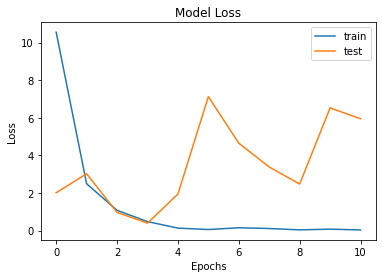

In [21]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

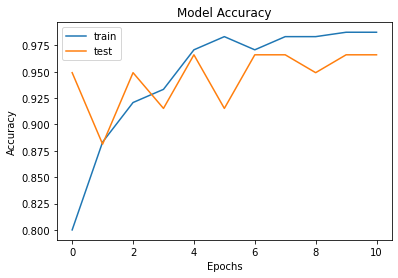

In [22]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

Model seems to have performed well ,let us go ahead and save it.

### Saving model

In [23]:
model.save('flowers.h5')

# Conclusion

So finally we've done our image classification on flowers(rose, lotus, sunflower). Lets recap - we first acquired the dataset and preprocessed our images according to the neural network ,and labels according to the 3 different classes, did some visualization on training data and started building our model consisting of 3 layers of convolutional neural networks, enhanced it by providing augmentation to data and again fitted it which resulted in better results and plotted accuracy and loss graphs for both training and validation data. Lastly, we saved our model for future purposes. 